# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives


Objectives to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


 there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

**STEPS**
1) Sourcing and Loading the Data
2) Cleaning The Data
3) Visualizing The Data
4) Modeling The Data

### 1. Sourcing and Loading the Data


#### 1.1. Importing Libraries

In [462]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [463]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


### 2. Cleaning The Data
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.


#### 2.1. Exploring The Data 

In [464]:
properties.head(10) # Checking out initial 10 rows of the data frame

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548
5,1995-05-01,84409.14932,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,...,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831,NaN,53678.24041
6,1995-06-01,94900.51244,53700.34831,90107.23471,64252.32335,74310.48167,82382.83435,121887.4625,69052.51103,81630.66181,...,44112.96432,45392.63981,45679.99539,50100.43023,56288.94557,75606.24501,65511.008,54420.15939,NaN,53735.15475
7,1995-07-01,110128.0423,52113.12157,91441.24768,63722.70055,74127.03788,82898.52264,124027.5768,69142.48112,82352.2226,...,44109.58764,45534.99864,46037.67312,49860.00809,57242.30186,75984.24079,65224.88465,54265.86368,NaN,53900.60633
8,1995-08-01,112329.4376,52232.19868,92361.31512,64432.60005,73547.0411,82054.37156,125529.8039,68993.42545,82706.65927,...,44193.66583,45111.45939,45922.53585,49598.45969,56732.40547,75529.34488,64851.60429,54365.71495,NaN,53600.31975
9,1995-09-01,104473.1096,51471.61353,93273.12245,64509.54767,73789.54287,81440.43008,120596.8511,69393.50023,82011.08271,...,44088.07696,44837.86023,45771.66321,49319.69715,56259.28635,74940.80872,64352.47119,54243.98694,NaN,53309.2331


In [465]:
properties.shape # Checking out the shape of DataFrame and find out that it has 339 Rows and 49 columns

(339, 49)

In [466]:
properties.dtypes # Here with the help of 'dtype' we know the data type of each column

Unnamed: 0              datetime64[ns]
City of London                  object
Barking & Dagenham              object
Barnet                          object
Bexley                          object
Brent                           object
Bromley                         object
Camden                          object
Croydon                         object
Ealing                          object
Enfield                         object
Greenwich                       object
Hackney                         object
Hammersmith & Fulham            object
Haringey                        object
Harrow                          object
Havering                        object
Hillingdon                      object
Hounslow                        object
Islington                       object
Kensington & Chelsea            object
Kingston upon Thames            object
Lambeth                         object
Lewisham                        object
Merton                          object
Newham                   

In [467]:
properties.columns # here are the list of columns


Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [468]:
#properties.rename(columns={'Unnamed: 0':'London_Borough'},inplace=True)
#properties.columns

#### 2.2. Transposing The Data

In [469]:
transposed_properties=properties.transpose() # With the help of '.T' ,we transposed the data
transposed_properties.head()


,0,1,2,3,4,5,6,7,8,9,...,329,330,331,332,333,334,335,336,337,338
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604


#### 2.3. Assigning first row to the heading and deleting that row

In [470]:

transposed_properties.columns=transposed_properties.iloc[0]
transposed_properties.drop(transposed_properties.index[0],inplace=True)
transposed_properties.head()




Unnamed: 0,NaT,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604
Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,73789.54287,...,529771.7571,532821.5739,549660.5579,560279.3404,580872.8243,577222.7821,572466.8925,564118.4765,560637.6337,548074.5348


In [471]:
transposed_properties.index 

Index(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent',
       'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Unnamed: 34', 'Inner London', 'Outer London', 'Unnamed: 37',
       'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

#### 2.4. Reseting and Renaming the Column Names

In [472]:
transposed_properties.reset_index(inplace=True)
transposed_properties.head()

Unnamed: 0,index,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00
0,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
1,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
2,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
3,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604
4,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,529771.7571,532821.5739,549660.5579,560279.3404,580872.8243,577222.7821,572466.8925,564118.4765,560637.6337,548074.5348


In [473]:
transposed_properties.rename(columns={'index':'London_Borough',pd.NaT:'ID'},inplace=True)
transposed_properties.head()

Unnamed: 0,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00
0,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
1,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
2,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
3,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604
4,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,529771.7571,532821.5739,549660.5579,560279.3404,580872.8243,577222.7821,572466.8925,564118.4765,560637.6337,548074.5348


In [474]:
transposed_properties.columns

Index([   'London_Borough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2022-05-01 00:00:00, 2022-06-01 00:00:00, 2022-07-01 00:00:00,
       2022-08-01 00:00:00, 2022-09-01 00:00:00, 2022-10-01 00:00:00,
       2022-11-01 00:00:00, 2022-12-01 00:00:00, 2023-01-01 00:00:00,
       2023-02-01 00:00:00],
      dtype='object', name='Unnamed: 0', length=340)

#### 2.5. Transforming the data

Here we are going to transform our DataFrame using **melt** methhod. Also renaming the columns name, **variable** to **Month** and **Value** to **Average_price**

In [475]:
Transformed_data=pd.melt(transposed_properties,id_vars= ['London_Borough', 'ID'],value_name='Average_price',var_name='Month')
Transformed_data

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
16219,LONDON,E12000007,2023-02-01,532212.4352
16220,SOUTH EAST,E12000008,2023-02-01,395571.4151
16221,SOUTH WEST,E12000009,2023-02-01,326615.6064
16222,Unnamed: 47,NaN,2023-02-01,NaN


In [476]:
# Checking the Columns Name
Transformed_data.columns

Index(['London_Borough', 'ID', 'Month', 'Average_price'], dtype='object')

#### 2.6. Checking and Changing the Required Data type

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [477]:
Transformed_data.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price             object
dtype: object

In [478]:
Transformed_data['Average_price']=pd.to_numeric(Transformed_data['Average_price'])
Transformed_data.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

#### 2.7. Checking and deleting **LONDON BOROUGH**

In [479]:
print(len(pd.unique(Transformed_data['London_Borough'])))

48


Here we got **48** unique **London Boroughs** but if remember there are only **32** **London Boroughs**.
So we have to check out the contents of the London Borough column, and have to delete Unnamed or those who are not included in London Boroughs. 

In [480]:
Transformed_data['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [481]:
LondonBorough = ['City of London' ,'City of Westminster','Kensington & Chelsea','Hammersmith & Fulham','Wandsworth','Lambeth','Southwark','Tower Hamlets',
                 'Hackney','Islington','Camden','Brent','Ealing','Hounslow','Richmond upon Thames','Kingston upon Thames','Merton','Sutton','Croydon','Bromley',
                 'Lewisham','Greenwich','Bexley','Havering','Barking & Dagenham','Redbridge','Newham','Waltham Forest','Haringey','Enfield','Barnet','Harrow',
                 'Hillingdon']

In [482]:
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']


In [483]:
Transformed_data['London_Borough'].isin(LondonBorough).sum()


10816

In [484]:
Transformed_data['London_Borough'].isin(nonBoroughs).sum()

4056

so we have total number of rows are **16224** and we have **4056** number of which has **nonBoroughs** data .so after deleting **4056** rows we should have 
**12168** rows left.

In [485]:
Transformed_data = Transformed_data[~Transformed_data.London_Borough.isin(nonBoroughs)]
Transformed_data

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
16207,Wandsworth,E09000032,2023-02-01,639194.17770
16208,Westminster,E09000033,2023-02-01,968017.39860
16209,Unnamed: 34,NaN,2023-02-01,NaN
16212,Unnamed: 37,NaN,2023-02-01,NaN


#### 2.8. Checking and Deleting **NAN** values

In [486]:
no_of_Nulls=Transformed_data.isna().sum()
no_of_Nulls

London_Borough       0
ID                1014
Month                0
Average_price     1014
dtype: int64

In [487]:
Transformed_data.dropna(axis=0,inplace=True) #1014 rows have null values
Transformed_data

C:\Users\sabhe\AppData\Local\Temp\ipykernel_41660\4215240250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transformed_data.dropna(axis=0,inplace=True) #1014 rows have null values


,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
16204,Sutton,E09000029,2023-02-01,447798.81270
16205,Tower Hamlets,E09000030,2023-02-01,502932.34100
16206,Waltham Forest,E09000031,2023-02-01,509781.86160
16207,Wandsworth,E09000032,2023-02-01,639194.17770


### 3. Visualizing The Data

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [496]:
Transformed_data['Year'] = Transformed_data['Month'].apply(lambda t: t.year)


C:\Users\sabhe\AppData\Local\Temp\ipykernel_41660\1533288716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transformed_data['Year'] = Transformed_data['Month'].apply(lambda t: t.year)


Text(0, 0.5, 'Price')

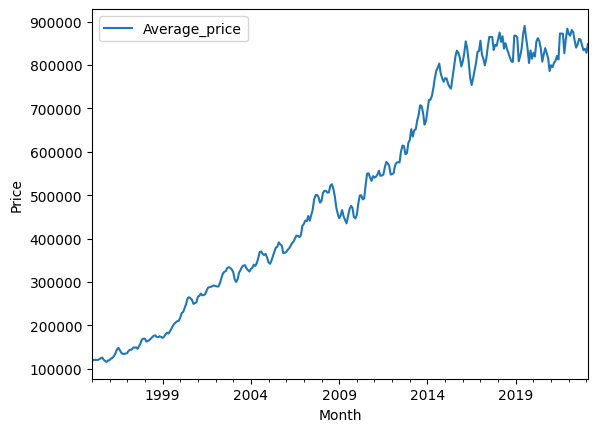

In [497]:
camden_prices = Transformed_data[Transformed_data['London_Borough'] == 'Camden']

# Make a variable called ax. Assign it the result of calling the plot() method, and plugging in the following values as parameters:
# kind ='line', x = 'Month', y='Average_price'
ax= camden_prices.plot(kind= 'line', x = 'Month', y='Average_price')

# Finally, call the set_ylabel() method on ax, and set that label to the string: 'Price'. 
ax.set_ylabel('Price')

In [504]:
dfg = Transformed_data.groupby(['London_Borough', 'Year'])['Average_price'].mean()
dfg.head(20)

London_Borough      Year
Barking & Dagenham  1995     51817.969390
                    1996     51718.192690
                    1997     55974.262309
                    1998     60285.821083
                    1999     65320.934441
                    2000     77549.513290
                    2001     88664.058223
                    2002    112221.912482
                    2003    142498.927800
                    2004    158175.982483
                    2005    163360.782017
                    2006    167853.342558
                    2007    184909.807383
                    2008    187356.865783
                    2009    156446.896358
                    2010    166560.705275
                    2011    163465.144225
                    2012    165863.911600
                    2013    173733.624933
                    2014    201172.229417
Name: Average_price, dtype: float64

In [ ]:
dfg.reset_index(drop=True, inplace=True)

### 4. Modeling

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 